# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
import xgboost as xgb
import joblib
import zipfile
from google.colab import files
uploaded = files.upload()

Saving Salaries.csv to Salaries.csv


# Data Cleaning and Preprocessing

In [2]:
df = pd.read_csv('Salaries.csv')

In [3]:
 df.shape

(148654, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Missing Values

In [6]:
df.isnull().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,609
OvertimePay,4
OtherPay,4
Benefits,36163
TotalPay,0
TotalPayBenefits,0
Year,0


In [7]:
df = df.drop(columns=['Notes', 'Status']) #useless columns


df['BasePay'] = df['BasePay'].fillna(0)
df['OvertimePay'] = df['OvertimePay'].fillna(0)
df['OtherPay'] = df['OtherPay'].fillna(0)
df['Benefits'] = df['Benefits'].fillna(0)

In [8]:
df.isnull().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,0
OvertimePay,0
OtherPay,0
Benefits,0
TotalPay,0
TotalPayBenefits,0
Year,0


In [9]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66053.729288,5065.923568,3648.669115,18924.232839,74768.321972,93692.554811,2012.522643
std,42912.857795,42886.711158,11454.256594,8056.515703,17165.279495,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,32792.545000,0.000000,0.000000,0.000000,36168.995000,44065.650000,2012.000000
50%,74327.500000,64861.600000,0.000000,811.170000,23214.020000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94605.740000,4657.632500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [10]:
salary_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for col in salary_cols:
    df[col] = df[col].apply(lambda x: 0 if x < 0 else x)


print("Min values after cleaning:")
print(df[salary_cols].min())

Min values after cleaning:
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
dtype: float64


# Exploretory Data Analysis (EDA)

TotalPayBenefits

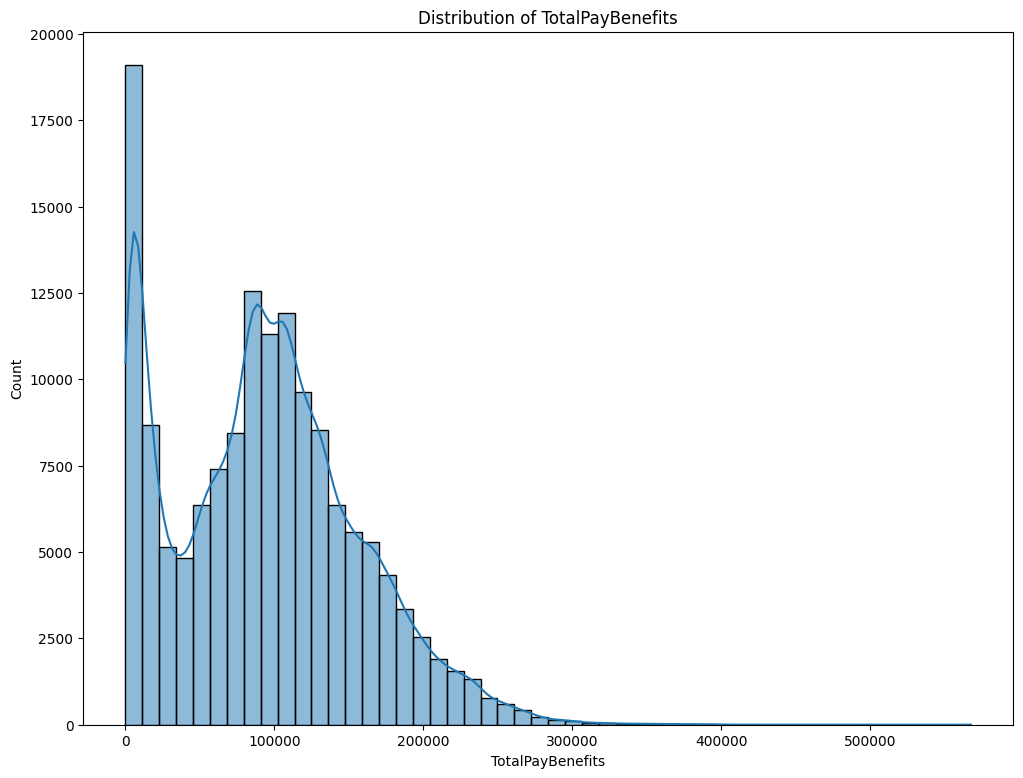

In [11]:
plt.figure(figsize=(12,9))
sns.histplot(df['TotalPayBenefits'], bins=50, kde=True)
plt.title("Distribution of TotalPayBenefits")
plt.xlabel("TotalPayBenefits")
plt.ylabel("Count")
plt.show()

Top 10 Highest Paid Employees

/tmp/ipython-input-4125367672.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_employees, x='TotalPayBenefits', y='EmployeeName', palette="viridis")


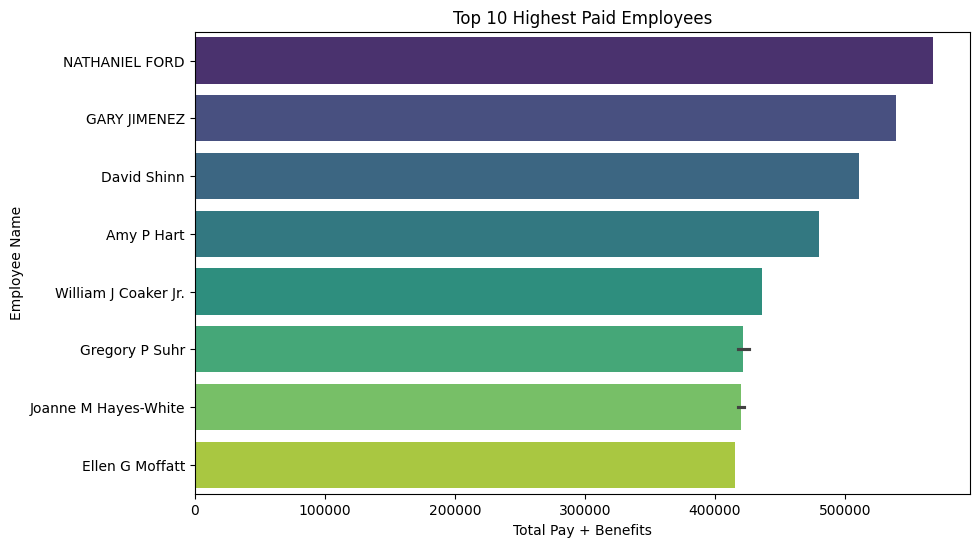

In [12]:
top_employees = df[['EmployeeName','TotalPayBenefits']].sort_values(by='TotalPayBenefits', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_employees, x='TotalPayBenefits', y='EmployeeName', palette="viridis")
plt.title("Top 10 Highest Paid Employees")
plt.xlabel("Total Pay + Benefits")
plt.ylabel("Employee Name")
plt.show()

Top 10 Highest Paying Job Titles

/tmp/ipython-input-4045733915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="coolwarm")


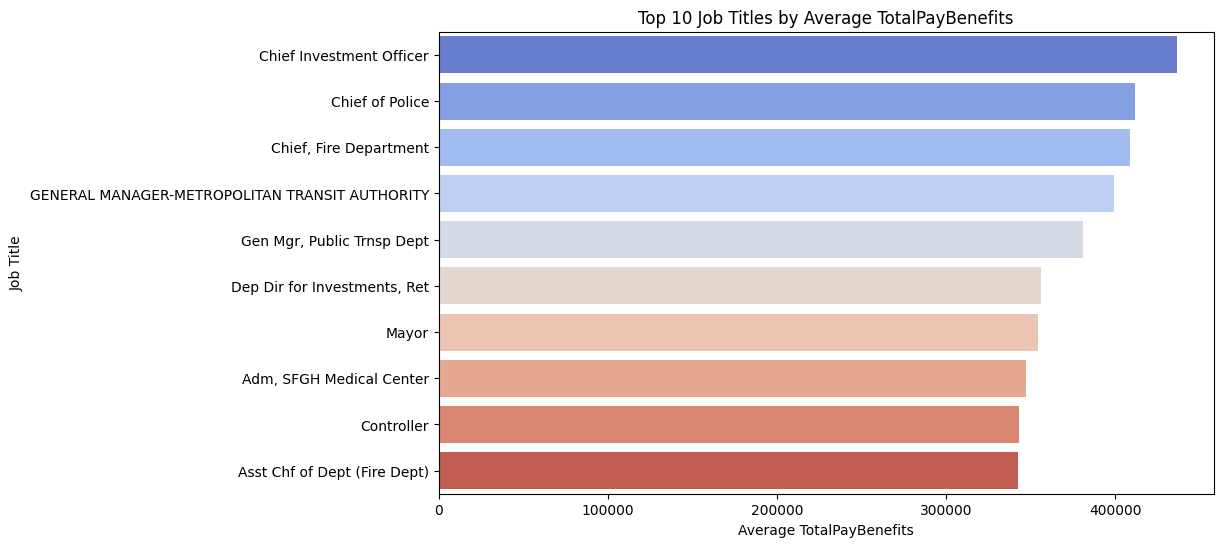

In [13]:
top_jobs = df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="coolwarm")
plt.title("Top 10 Job Titles by Average TotalPayBenefits")
plt.xlabel("Average TotalPayBenefits")
plt.ylabel("Job Title")
plt.show()

Average TotalPayBenefits Over Years


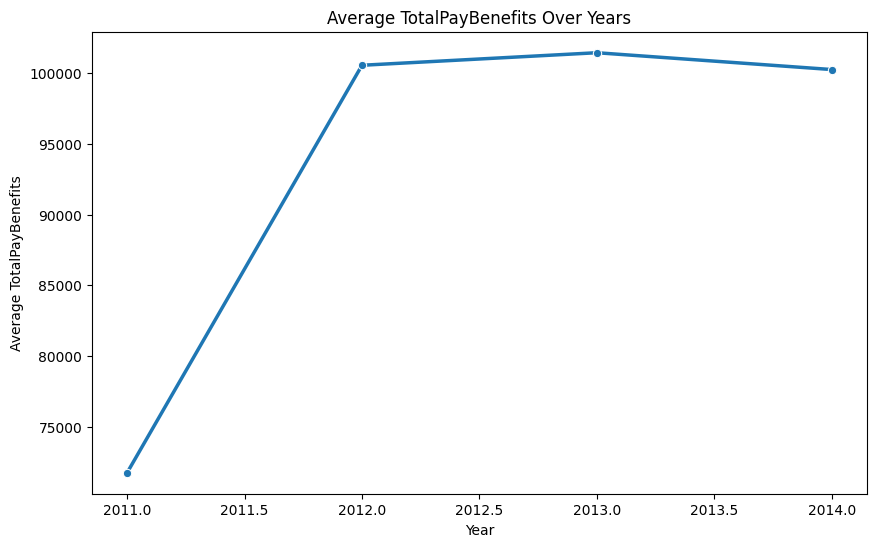

In [14]:
yearly_trend = df.groupby('Year')['TotalPayBenefits'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", linewidth=2.5)
plt.title("Average TotalPayBenefits Over Years")
plt.xlabel("Year")
plt.ylabel("Average TotalPayBenefits")
plt.show()

 Relationship between employees’ BasePay and their OvertimePay

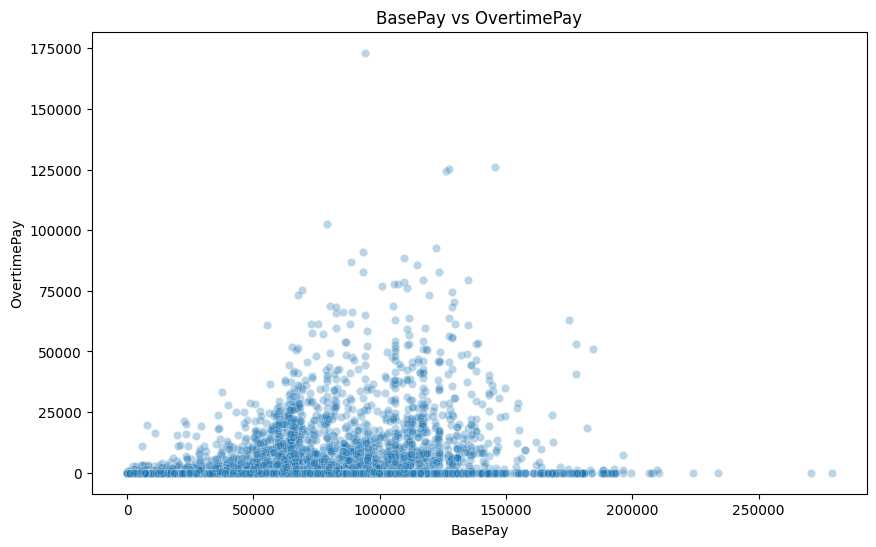

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(5000), x="BasePay", y="OvertimePay", alpha=0.3)
plt.title("BasePay vs OvertimePay")
plt.xlabel("BasePay")
plt.ylabel("OvertimePay")
plt.show()

It’s a scatterplot showing the relationship between employees’ BasePay (x-axis) and their OvertimePay (y-axis), where most employees cluster at lower overtime, while a few outliers earn extremely high overtime.

Correlation Heatmap

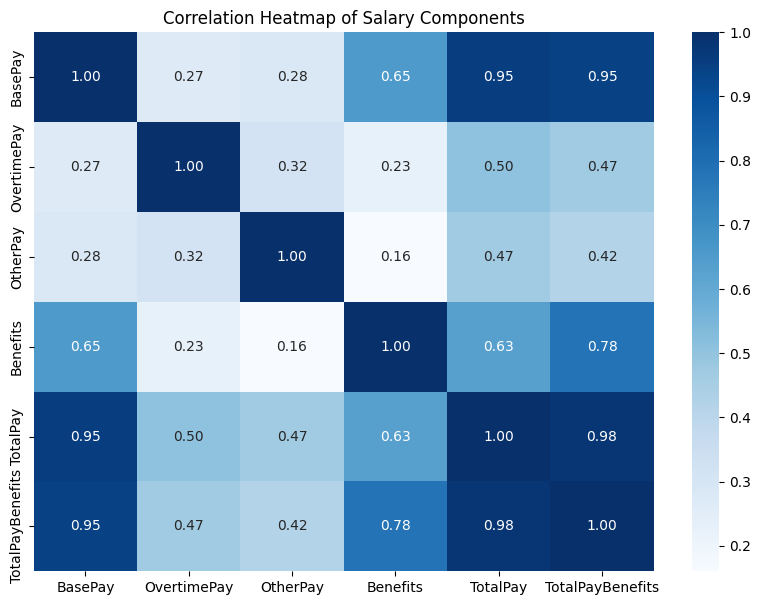

In [16]:
plt.figure(figsize=(10,7))
corr = df[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']].corr()

sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Salary Components")
plt.show()

Top 10 Employees & Jobs by Overtime

/tmp/ipython-input-1858984143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overtime_employees, x='OvertimePay', y='EmployeeName', palette="magma")


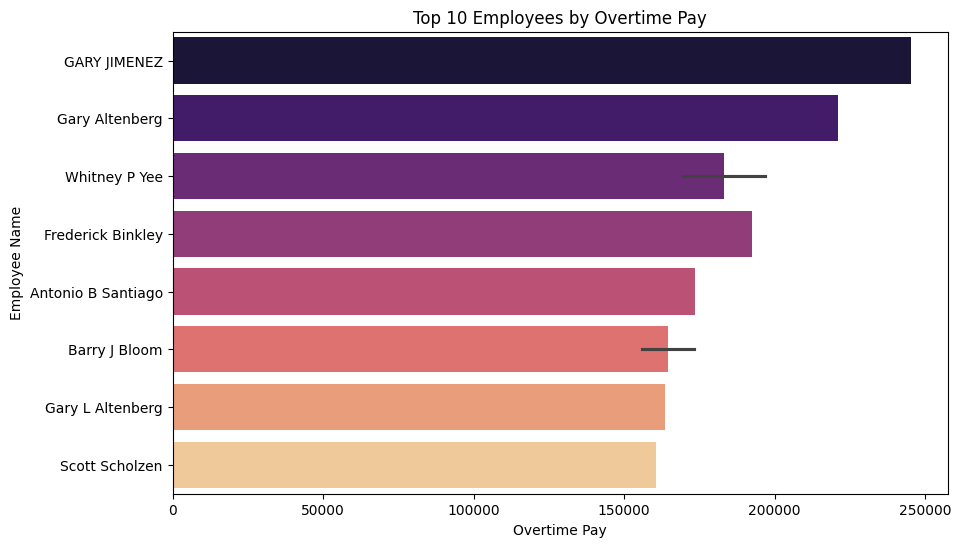

In [17]:
top_overtime_employees = df[['EmployeeName','OvertimePay']].sort_values(by='OvertimePay', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_overtime_employees, x='OvertimePay', y='EmployeeName', palette="magma")
plt.title("Top 10 Employees by Overtime Pay")
plt.xlabel("Overtime Pay")
plt.ylabel("Employee Name")
plt.show()

Top 10 Jobs by Average OvertimePay

/tmp/ipython-input-737989902.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_overtime_jobs.values, y=top_overtime_jobs.index, palette="cividis")


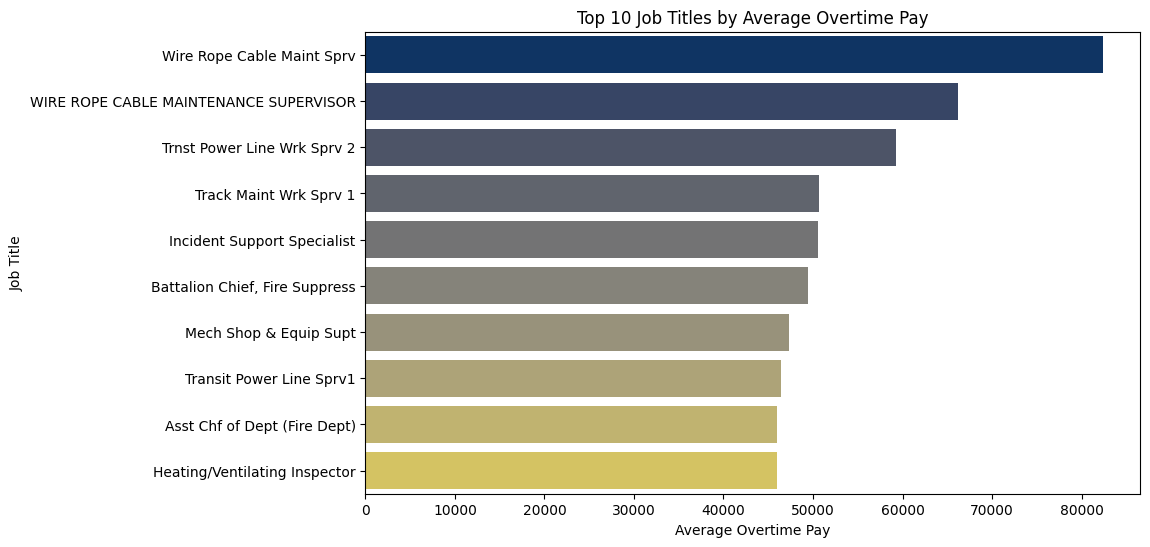

In [18]:
top_overtime_jobs = df.groupby('JobTitle')['OvertimePay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_overtime_jobs.values, y=top_overtime_jobs.index, palette="cividis")
plt.title("Top 10 Job Titles by Average Overtime Pay")
plt.xlabel("Average Overtime Pay")
plt.ylabel("Job Title")
plt.show()

/tmp/ipython-input-786614770.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_pay.values, y=dept_pay.index, palette="Set2")


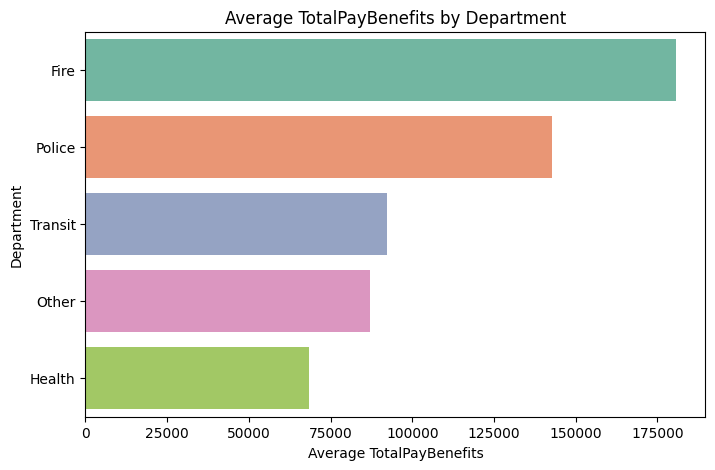

In [19]:
# Create Department Column

def assign_department(title):
    title = str(title).lower()
    if "police" in title:
        return "Police"
    elif "fire" in title:
        return "Fire"
    elif "transit" in title:
        return "Transit"
    elif "health" in title:
        return "Health"
    else:
        return "Other"

df['Department'] = df['JobTitle'].apply(assign_department)


# Average TotalPayBenefits by Department

dept_pay = df.groupby('Department')['TotalPayBenefits'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=dept_pay.values, y=dept_pay.index, palette="Set2")
plt.title("Average TotalPayBenefits by Department")
plt.xlabel("Average TotalPayBenefits")
plt.ylabel("Department")
plt.show()


The code classifies employees into departments based on their job titles, calculates the average **TotalPayBenefits** per department, and plots a bar chart to compare them.


# Model Training

Select features & target

In [20]:
df_model = df.copy()

Encode JobTitle

In [21]:
le = LabelEncoder()
df_model["JobTitle"] = le.fit_transform(df_model["JobTitle"])

X = df_model[["BasePay", "OvertimePay", "OtherPay", "Benefits", "Year", "JobTitle"]]
y = df_model["TotalPayBenefits"]

Train/Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train models

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

Results comparison

In [24]:
results_df = pd.DataFrame(results).T
print("Model Performance:\n", results_df)

Model Performance:
                          R2          MAE         RMSE
Linear Regression  1.000000     0.254048    40.942813
Random Forest      0.997616   519.112396  3068.593590
XGBoost            0.996743  1140.804365  3587.116287


Actual vs Predicted plot

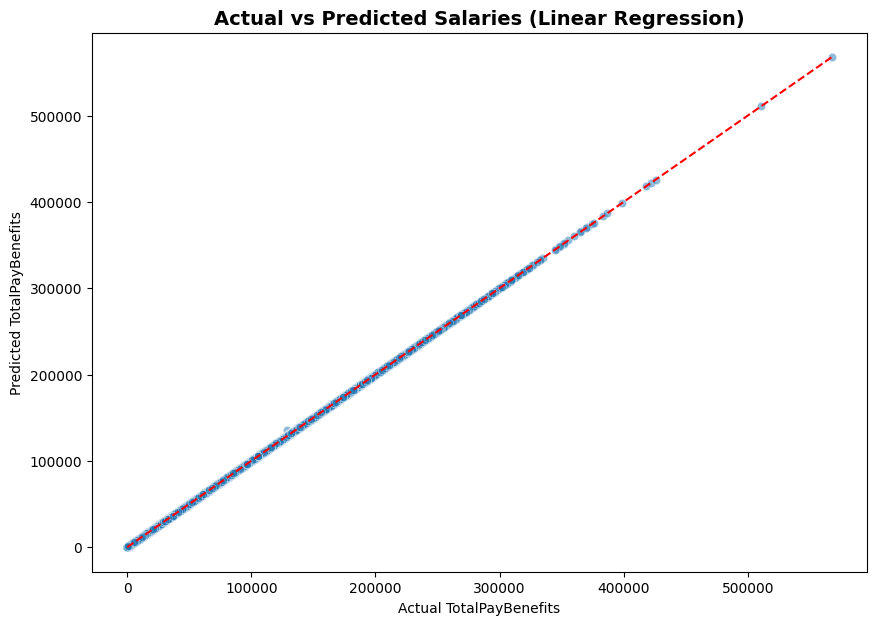

In [25]:
best_model_name = results_df["R2"].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10,7))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.xlabel("Actual TotalPayBenefits")
plt.ylabel("Predicted TotalPayBenefits")
plt.title(f"Actual vs Predicted Salaries ({best_model_name})", fontsize=14, fontweight="bold")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()


# Classification Models: High vs Low Income Employees


Logistic Regression Accuracy: 0.9188
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     14866
           1       0.92      0.92      0.92     14865

    accuracy                           0.92     29731
   macro avg       0.92      0.92      0.92     29731
weighted avg       0.92      0.92      0.92     29731


Random Forest Accuracy: 0.9830
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14866
           1       0.98      0.98      0.98     14865

    accuracy                           0.98     29731
   macro avg       0.98      0.98      0.98     29731
weighted avg       0.98      0.98      0.98     29731


XGBoost Accuracy: 0.9835
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14866
           1       0.98      0.98      0.98     14865

    accuracy                           0.98     29731
   macro avg       0.98      0.9

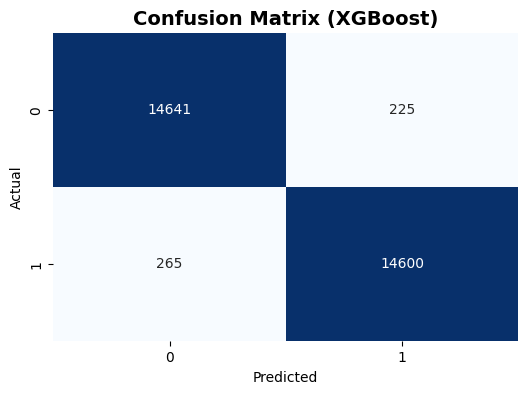

In [26]:

#  Create classification label (High vs Low)

df_class3 = df.copy()

median_salary = df_class3["TotalPayBenefits"].median()
df_class3["IncomeLevel"] = np.where(df_class3["TotalPayBenefits"] > median_salary, 1, 0)


#  Features (reduced to avoid leakage)

le = LabelEncoder()
df_class3["JobTitle"] = le.fit_transform(df_class3["JobTitle"])

X = df_class3[["BasePay", "OvertimePay", "JobTitle", "Year"]]
y = df_class3["IncomeLevel"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#  Train Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


# Confusion Matrix for best model

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix ({best_model_name})", fontsize=14, fontweight="bold")
plt.show()


This output shows that all models perform well, with Logistic Regression reaching **92% accuracy** while Random Forest and XGBoost achieve about **98% accuracy**, and the similarity in their precision, recall, and f1-scores happens because the dataset is **perfectly balanced** between the two classes.


# Regression Models

In [27]:
# Step 1: Features & Target
X = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']]
y = df['TotalPayBenefits']

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Step 4: Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n{name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")


Linear Regression Results:
R² Score: 1.0000
MAE: 0.25
RMSE: 40.94

Random Forest Results:
R² Score: 0.9977
MAE: 501.86
RMSE: 3026.56

XGBoost Results:
R² Score: 0.9967
MAE: 1172.39
RMSE: 3609.42


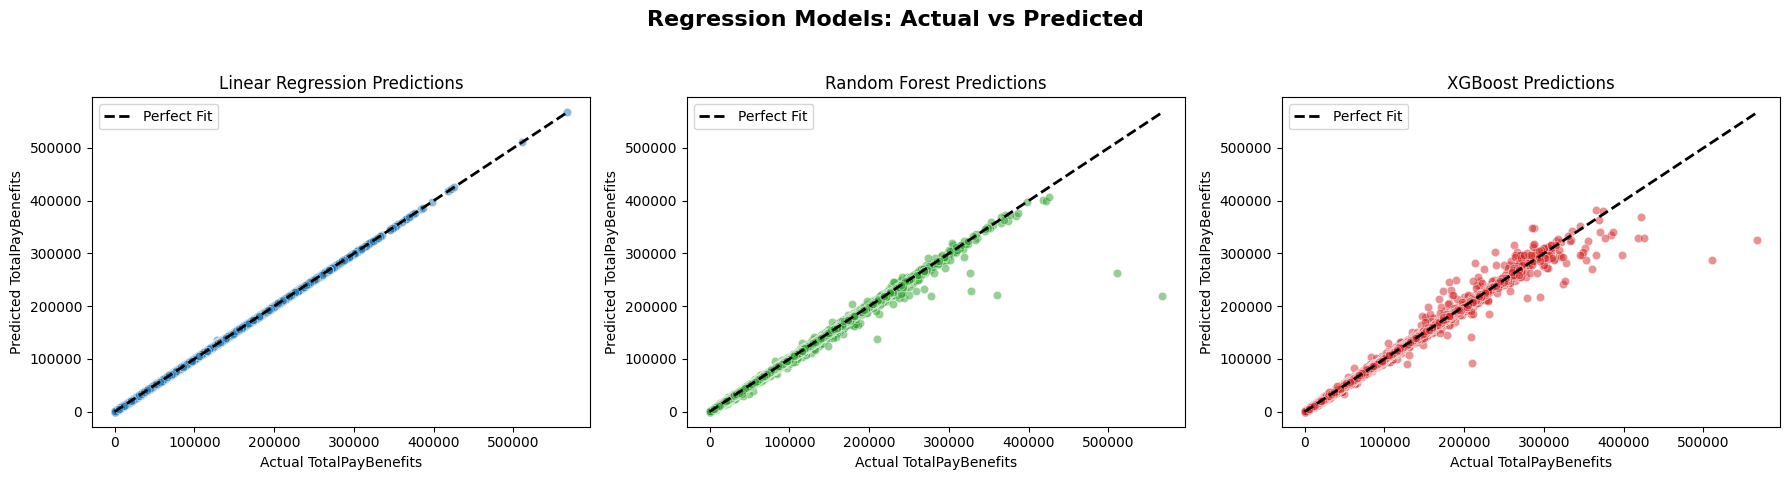

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
}


plt.figure(figsize=(18, 5))
colors = ["#1f77b4", "#2ca02c", "#d62728"]

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color=colors[i-1])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'k--', lw=2, label="Perfect Fit")
    plt.xlabel("Actual TotalPayBenefits")
    plt.ylabel("Predicted TotalPayBenefits")
    plt.title(f"{name} Predictions")
    plt.legend()

plt.suptitle("Regression Models: Actual vs Predicted", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Anomaly Detection

Number of detected outliers: 29607

Sample outliers:
         EmployeeName                                        JobTitle  \
0      NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1        GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2      ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4     PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
5      DAVID SULLIVAN                       ASSISTANT DEPUTY CHIEF II   
6           ALSON LEE              BATTALION CHIEF, (FIRE DEPARTMENT)   
7       DAVID KUSHNER                  DEPUTY DIRECTOR OF INVESTMENTS   
8      MICHAEL MORRIS              BATTALION CHIEF, (FIRE DEPARTMENT)   
9  JOANNE HAYES-WHITE          CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)   

   TotalPayBenefits  
0         567595.43  
1         538909.28  
2         335279.91  
3         332343.61  
4         326373.19  
5         3

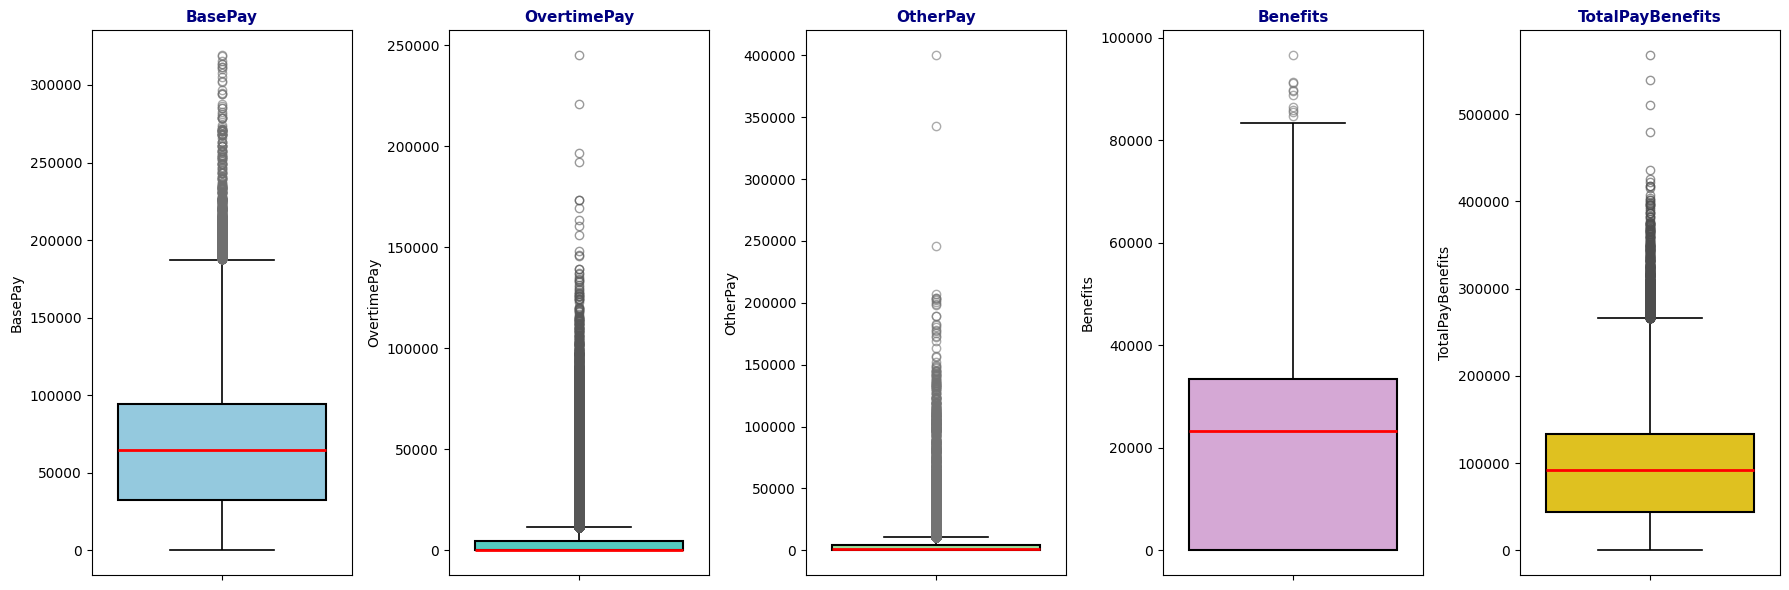

In [29]:
# Step 1: Select numeric columns
numeric_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']

# Step 2: Detect outliers using IQR
outliers = pd.DataFrame()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = (df[col] < lower) | (df[col] > upper)

# Step 3: Find rows with at least one outlier
df_outliers = df[outliers.any(axis=1)]

print("Number of detected outliers:", df_outliers.shape[0])
print("\nSample outliers:")
print(df_outliers[['EmployeeName', 'JobTitle', 'TotalPayBenefits']].head(10))

# Step 4: Visualize with boxplots (custom colors)
colors = ["skyblue", "turquoise", "lightgreen", "plum", "gold"]

plt.figure(figsize=(18, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(
        y=df[col],
        color=colors[i-1],
        boxprops=dict(edgecolor="black", linewidth=1.5),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black", linewidth=1.2),
        capprops=dict(color="black", linewidth=1.2),
        flierprops=dict(marker='o', color='darkorange', alpha=0.6)
    )
    plt.title(col, fontsize=11, fontweight="bold", color="navy")

plt.tight_layout()
plt.show()


Boxplot with anomalies

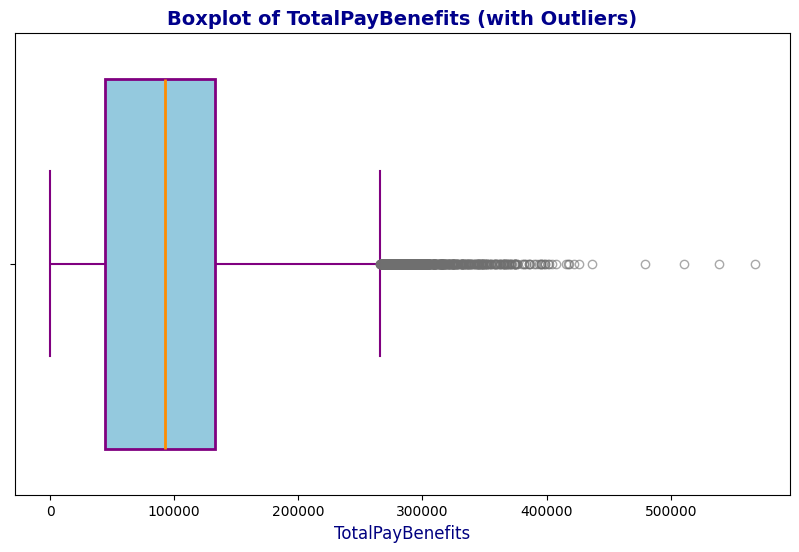

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=df["TotalPayBenefits"],
    color="skyblue",
    boxprops=dict(edgecolor="purple", linewidth=2),
    medianprops=dict(color="darkorange", linewidth=2),
    whiskerprops=dict(color="purple", linewidth=1.5),
    capprops=dict(color="purple", linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.6)
)
plt.title("Boxplot of TotalPayBenefits (with Outliers)", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("TotalPayBenefits", fontsize=12, color="navy")
plt.show()



Histogram with anomalies

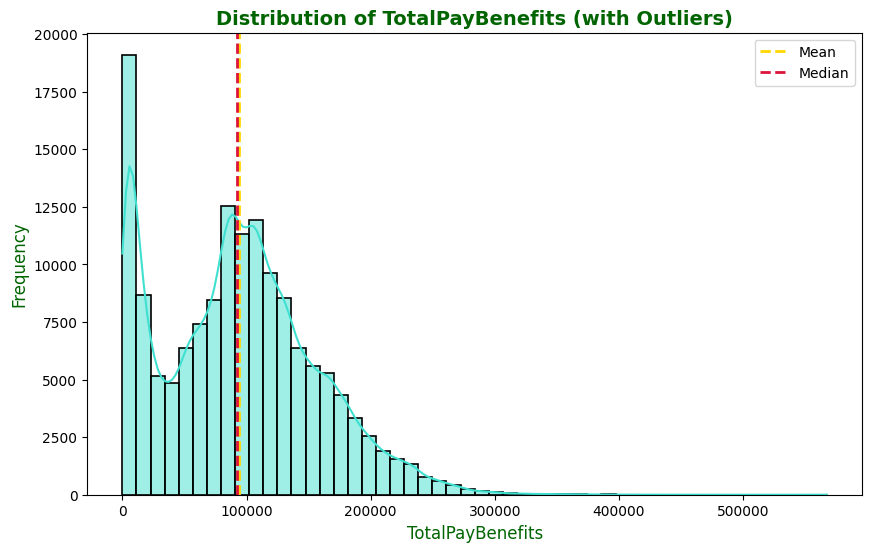

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df["TotalPayBenefits"], bins=50, kde=True, color="turquoise", edgecolor="black", linewidth=1.2)
plt.axvline(df["TotalPayBenefits"].mean(), color='gold', linestyle='--', linewidth=2, label="Mean")
plt.axvline(df["TotalPayBenefits"].median(), color='crimson', linestyle='--', linewidth=2, label="Median")
plt.title("Distribution of TotalPayBenefits (with Outliers)", fontsize=14, fontweight="bold", color="darkgreen")
plt.xlabel("TotalPayBenefits", fontsize=12, color="darkgreen")
plt.ylabel("Frequency", fontsize=12, color="darkgreen")
plt.legend()
plt.show()


Outliers are not necessarily errors—high salaries for senior or executive positions are naturally much larger than average employees. Some values could be data entry mistakes (like negative pay), and the large salary differences reflect real-world imbalance between regular staff and top management in most large organizations.


# Model Saving

In [32]:
# Best Classification Model: XGBoost
best_classification_model = models['XGBoost']
joblib.dump(best_classification_model, 'best_classification_model.pkl')

#Best Regression Model: Linear Regression
best_regression_model = models['Linear Regression']
joblib.dump(best_regression_model, 'best_regression_model.pkl')

print("Models saved successfully!")


Models saved successfully!


In [33]:
zip_filename = "models.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write('best_classification_model.pkl')
    zipf.write('best_regression_model.pkl')

files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Project Summary

This project analyzes San Francisco employee salaries, performing data cleaning, EDA, regression, and classification. We explore salary distribution, top earners, overtime patterns, and departmental differences. Models like Linear Regression, Random Forest, and XGBoost predict salaries and classify employees into high/low income levels, with XGBoost achieving ~98% classification accuracy.